In [109]:
import numpy as np
import pandas as pd
import tensorflow as tf
import adversial_model

history_3a = pd.read_pickle("Case_3/checkpoints/model_ep_40/Run_2/trial_0/train_history.pkl")
history_3b = pd.read_pickle("Case_3/checkpoints/model_ep_40/Run_3/trial_0/train_history.pkl")
history_3c_40 = pd.read_pickle("Case_3/checkpoints/model_ep_40/Run_5/trial_0/train_history.pkl")
history_3c_160 = pd.read_pickle("Case_3/checkpoints/model_ep_160/Run_0/trial_1/train_history.pkl")
history_3acheat = pd.read_pickle("Case_3/checkpoints/model_ep_40/Run_4/trial_0/train_history.pkl")
history_3d = pd.read_pickle("Case_3/checkpoints/model_ep_160/Run_1/trial_0/train_history.pkl")
history_3d_not_balanced = pd.read_pickle("Case_3/checkpoints/model_ep_160/Run_3/trial_0/train_history.pkl")
history_3d_not_balanced_init = pd.read_pickle("Case_3/checkpoints/model_ep_160/Run_11/trial_0/train_history.pkl")
history_3d_cheat = pd.read_pickle("Case_3/checkpoints/model_ep_40/Run_6/trial_0/train_history.pkl")
history_3d_320= pd.read_pickle("Case_3/checkpoints/model_ep_320/Run_0/trial_0/train_history.pkl")
history_3d_subgroup= pd.read_pickle("Case_3/checkpoints/model_ep_160/Run_2/trial_0/train_history.pkl")
history_3e_samples_group= pd.read_pickle("Case_3/checkpoints/model_ep_160/Run_5/trial_0/train_history.pkl")
history_3e_samples_subgroup= pd.read_pickle("Case_3/checkpoints/model_ep_160/Run_6/trial_0/train_history.pkl")

In [5]:
history_3a[[c for c in history_3a.columns if "cluster" in c]]

,cluster_acc_00,cluster_acc_10,cluster_acc_01,cluster_acc_11,cluster_weight_00,cluster_weight_10,cluster_weight_01,cluster_weight_11
0,0.666508,0.296355,0.548832,0.89653,1,1.18508,1.17385,1
1,0.838357,0.48649,0.525464,0.875878,1,1.36101,1.34906,1
2,0.92262,0.676054,0.426004,0.773981,1,1.48429,1.52304,1
3,0.943271,0.768549,0.391252,0.700807,1,1.57165,1.67782,1
4,0.950392,0.808292,0.397244,0.671769,1,1.6427,1.81508,1
5,0.943033,0.81258,0.451168,0.672922,1,1.70793,1.92596,1
6,0.936387,0.819157,0.48592,0.671454,1,1.76655,2.01873,1
7,0.930691,0.826162,0.51408,0.667261,1,1.81881,2.09532,1
8,0.926181,0.83045,0.537448,0.664745,1,1.86668,2.15897,1
9,0.919535,0.832738,0.56441,0.665583,1,1.91007,2.20955,1


In [6]:
history_3b[[c for c in history_3b.columns if "weight" in c]]

,cluster_weight_00,cluster_weight_10,cluster_weight_01,cluster_weight_11
0,1.167,1.17296,1.17193,1.16884
1,1.32955,1.34833,1.33618,1.32448
2,1.48157,1.51876,1.49997,1.47393
3,1.62349,1.68512,1.6634,1.61806
4,1.75512,1.84732,1.82603,1.75694
5,1.87858,2.00652,1.98833,1.8909
6,1.99518,2.16285,2.14927,2.02004
7,2.10359,2.31445,2.31184,2.14617
8,2.20738,2.46581,2.47192,2.26712
9,2.30569,2.61465,2.63252,2.38502


In [7]:
history_3c[[c for c in history_3c.columns if "cluster" in c]]

,cluster_acc_00,cluster_acc_10,cluster_acc_01,cluster_acc_11,cluster_weight_00,cluster_weight_10,cluster_weight_01,cluster_weight_11,cluster_grad_00,cluster_grad_10,cluster_grad_01,cluster_grad_11
0,0.504629,0.446319,0.782504,0.822308,0.992842,1.0073,1.0066,0.9934,0.000715796,0.000730059,0.000659684,0.000659955
1,0.650368,0.510079,0.766926,0.870741,0.986132,1.01439,1.01318,0.987025,0.000671003,0.000708606,0.00065851,0.000637506
2,0.733681,0.545247,0.761534,0.889611,0.979789,1.02134,1.01975,0.980919,0.000634343,0.000695343,0.000656713,0.000610671
3,0.79587,0.57827,0.730977,0.892966,0.973817,1.02815,1.0263,0.975006,0.000597116,0.000680932,0.000655221,0.000591229
4,0.836696,0.60143,0.702816,0.886885,0.968185,1.03484,1.03284,0.969265,0.000563289,0.000668612,0.000654285,0.000574092
5,0.865179,0.624303,0.679449,0.880071,0.962892,1.04138,1.03941,0.963653,0.000529243,0.000654091,0.000656303,0.00056126
6,0.882507,0.638885,0.665069,0.871685,0.957862,1.04778,1.04593,0.958158,0.000502969,0.000639957,0.000652484,0.000549458
7,0.891764,0.646176,0.661474,0.870112,0.953042,1.05409,1.05245,0.952817,0.000482002,0.000631881,0.000651878,0.000534088
8,0.89841,0.654753,0.650689,0.866967,0.948462,1.06034,1.05903,0.947579,0.000457999,0.000624036,0.000657749,0.000523819
9,0.903869,0.661044,0.636908,0.864346,0.944098,1.06644,1.06559,0.942405,0.000436459,0.000610612,0.000656169,0.000517462


In [8]:
history_3c_160[[c for c in history_3c_160.columns if "cluster" in c]]

,cluster_acc_00,cluster_acc_10,cluster_acc_01,cluster_acc_11,cluster_weight_00,cluster_weight_10,cluster_weight_01,cluster_weight_11,cluster_grad_00,cluster_grad_10,cluster_grad_01,cluster_grad_11
0,0.451222,0.349249,0.727382,0.878708,0.992797,1.00736,1.00683,0.993505,0.000720335,0.000735853,0.000682873,0.000649517
1,0.695466,0.459042,0.717196,0.911836,0.986071,1.01457,1.01359,0.987269,0.000672605,0.000721412,0.000676252,0.000623536
2,0.838832,0.530236,0.668664,0.904917,0.979779,1.02157,1.02037,0.981216,0.00062911,0.000700127,0.000677994,0.000605356
3,0.882981,0.558542,0.645297,0.900619,0.973854,1.02842,1.02714,0.975354,0.000592539,0.000684693,0.000676721,0.000586222
4,0.904581,0.581558,0.627322,0.894538,0.968313,1.03513,1.03388,0.969648,0.000554148,0.000671113,0.000673841,0.000570538
5,0.912889,0.602287,0.618334,0.889506,0.963028,1.04173,1.04066,0.964109,0.000528452,0.000659485,0.000678174,0.000553909
6,0.919297,0.615297,0.601558,0.88374,0.958065,1.04817,1.04743,0.958667,0.000496345,0.000644179,0.000676908,0.000544226
7,0.921196,0.619871,0.597364,0.88416,0.953317,1.05454,1.0542,0.953373,0.000474772,0.00063719,0.000677043,0.000529438
8,0.924519,0.627448,0.584182,0.879547,0.948776,1.06079,1.06094,0.94817,0.000454134,0.000625242,0.000673831,0.00052023
9,0.926656,0.638599,0.580587,0.872733,0.944458,1.06697,1.06767,0.943047,0.000431764,0.000617301,0.000673752,0.000512337


In [9]:
history_3cheat[[c for c in history_3cheat.columns if "cluster" in c]]

,cluster_acc_00,cluster_acc_10,cluster_acc_01,cluster_acc_11,cluster_weight_00,cluster_weight_10,cluster_weight_01,cluster_weight_11
0,0.589604,0.685204,0.520671,0.440717,1,2.68642,2.30132,1.68159
1,0.834085,0.807148,0.498502,0.44858,1,2.68642,2.30132,1.68159
2,0.869689,0.796426,0.581786,0.563371,1,2.68642,2.30132,1.68159
3,0.885355,0.793567,0.612343,0.629835,1,2.68642,2.30132,1.68159
4,0.883693,0.778985,0.654883,0.678268,1,2.68642,2.30132,1.68159
5,0.886779,0.779128,0.680048,0.699654,1,2.68642,2.30132,1.68159
6,0.886067,0.772838,0.689635,0.718734,1,2.68642,2.30132,1.68159
7,0.885355,0.769979,0.696824,0.729112,1,2.68642,2.30132,1.68159
8,0.883931,0.773267,0.702217,0.730789,1,2.68642,2.30132,1.68159
9,0.882269,0.771837,0.710605,0.734668,1,2.68642,2.30132,1.68159


In [13]:
history_3d[[c for c in history_3d.columns if "cluster" in c]]

,cluster_acc_00,cluster_acc_10,cluster_acc_01,cluster_acc_11,cluster_weight_00,cluster_weight_10,cluster_weight_01,cluster_weight_11,cluster_grad_00,cluster_grad_10,cluster_grad_01,cluster_grad_11
0,0.397579,0.583274,0.884362,0.66118,1.00899,0.994585,0.988809,1.00196,0.000739698,0.000698624,0.000632511,0.000688853
1,0.540707,0.547391,0.882564,0.873572,1.01781,0.989271,0.978217,1.00381,0.000710167,0.000698693,0.000609702,0.000646562
2,0.672205,0.557684,0.846016,0.904707,1.0093,0.9944,0.988558,1.002,0.000672586,0.000689209,0.000603564,0.000617329
3,0.773795,0.581844,0.807669,0.901667,1.00119,0.999285,0.998857,1.0002,0.00062932,0.00067008,0.000609233,0.000601383
4,0.814859,0.581701,0.797484,0.907433,0.993277,1.00405,1.00892,0.998439,0.000603989,0.000665386,0.000605124,0.000573569
5,0.844291,0.593281,0.767525,0.902506,0.985654,1.00864,1.01885,0.996703,0.000568606,0.000657268,0.00059885,0.000558353
6,0.856397,0.600429,0.756141,0.899465,0.978266,1.01309,1.02868,0.994982,0.000543031,0.000647672,0.000600788,0.00054186
7,0.864467,0.608149,0.736968,0.894538,0.971124,1.01739,1.03848,0.993267,0.000514355,0.000639625,0.000607316,0.000528724
8,0.870638,0.615011,0.724985,0.891498,0.964169,1.02158,1.04818,0.99157,0.000492214,0.000634336,0.000605034,0.000514813
9,0.877759,0.624732,0.7142,0.886781,0.957417,1.02565,1.05785,0.989878,0.000469238,0.000627255,0.000606214,0.00050636


In [16]:
history_3d_cheat[[c for c in history_3d_cheat.columns if "cluster" in c]]

,cluster_acc_00,cluster_acc_10,cluster_acc_01,cluster_acc_11,cluster_weight_00,cluster_weight_10,cluster_weight_01,cluster_weight_11,cluster_grad_00,cluster_grad_10,cluster_grad_01,cluster_grad_11
0,0.586755,0.897784,0.476932,0.154838,0.231358,1.46294,1.00915,0.998399,0.000697878,0.000646678,0.000715189,0.000769314
1,0.552813,0.755111,0.803475,0.585596,0.231358,1.46294,1.00915,0.998399,0.000702985,0.000669786,0.000661581,0.000697677
2,0.626394,0.698928,0.84302,0.746724,0.231358,1.46294,1.00915,0.998399,0.000685757,0.000666156,0.000631998,0.000661965
3,0.702825,0.709364,0.834032,0.765594,0.231358,1.46294,1.00915,0.998399,0.000664509,0.000648246,0.000615172,0.00064207
4,0.751721,0.726519,0.819053,0.762134,0.231358,1.46294,1.00915,0.998399,0.000642024,0.000627373,0.00060141,0.000630049
5,0.754807,0.707219,0.829239,0.78656,0.231358,1.46294,1.00915,0.998399,0.000629464,0.000623708,0.000578613,0.000605259
6,0.777593,0.72466,0.820252,0.775763,0.231358,1.46294,1.00915,0.998399,0.000606645,0.000603706,0.000571032,0.000598974
7,0.783052,0.724803,0.822049,0.778908,0.231358,1.46294,1.00915,0.998399,0.000592204,0.000599753,0.00055214,0.000582628
8,0.789699,0.726948,0.82145,0.78048,0.231358,1.46294,1.00915,0.998399,0.000580467,0.000586383,0.000548854,0.000570756
9,0.791123,0.725661,0.820851,0.787085,0.231358,1.46294,1.00915,0.998399,0.000568559,0.00058016,0.000535188,0.00055944


In [8]:
history_3d_320[[c for c in history_3d_320.columns if "cluster" in c]][-200:-150]

,cluster_acc_00,cluster_acc_10,cluster_acc_01,cluster_acc_11,cluster_weight_00,cluster_weight_10,cluster_weight_01,cluster_weight_11,cluster_grad_00,cluster_grad_10,cluster_grad_01,cluster_grad_11
120,0.826489,0.758685,0.85021,0.812035,0.386009,1.3698,1.20084,0.964859,0.00041081,0.00046083,0.000346191,0.000444135
121,0.82554,0.758971,0.852007,0.81214,0.381373,1.37259,1.1935,0.966145,0.000414099,0.000457497,0.000343737,0.000445103
122,0.825303,0.758971,0.852606,0.81214,0.376734,1.37539,1.18627,0.96741,0.00041412,0.00046131,0.000334676,0.000443182
123,0.826489,0.761544,0.852606,0.809938,0.37209,1.37818,1.17893,0.968693,0.00041691,0.000455288,0.000344211,0.000447935
124,0.825065,0.759971,0.854404,0.811615,0.36744,1.38098,1.17164,0.969969,0.000417914,0.000457203,0.000343396,0.000446898
125,0.824591,0.758685,0.854404,0.812664,0.362778,1.38379,1.16442,0.971232,0.000419779,0.000457743,0.000337559,0.000447018
126,0.823641,0.759257,0.8568,0.812664,0.358106,1.3866,1.15728,0.972482,0.00042184,0.000457127,0.00033295,0.000445378
127,0.823166,0.758828,0.8574,0.813293,0.353429,1.38942,1.15016,0.973727,0.000422423,0.000459438,0.000332431,0.000445822
128,0.822217,0.759685,0.8574,0.812769,0.348784,1.39222,1.14308,0.974966,0.000420052,0.000457587,0.000332178,0.000444753
129,0.82103,0.758542,0.857999,0.812769,0.344089,1.39505,1.13601,0.976202,0.00042528,0.00046195,0.000332829,0.000444433


In [6]:
history_3d_subgroup[[c for c in history_3d_subgroup.columns if "cluster" in c and "grad" not in c]]

,cluster_acc_00,cluster_acc_01,cluster_acc_02,cluster_acc_03,cluster_acc_10,cluster_acc_11,cluster_acc_12,cluster_acc_13,cluster_weight_00,cluster_weight_01,cluster_weight_02,cluster_weight_03,cluster_weight_10,cluster_weight_11,cluster_weight_12,cluster_weight_13
0,0.755102,0.893425,0.391494,0.513985,0.369159,0.186254,0.822109,0.691385,0.991282,0.991563,1.00536,1.00508,1.01204,1.0124,0.998107,0.997815
1,0.843537,0.881117,0.48855,0.463475,0.46729,0.376632,0.880559,0.884826,0.982746,0.983193,1.01034,1.01015,1.02357,1.02415,0.996251,0.995746
2,0.909297,0.894926,0.591058,0.502962,0.476636,0.46323,0.878018,0.907564,0.97462,0.975053,1.01514,1.01507,1.03482,1.03553,0.994279,0.993755
3,0.928571,0.908136,0.651036,0.526489,0.476636,0.498969,0.860229,0.91042,0.966852,0.967191,1.0196,1.01983,1.04603,1.04667,0.99228,0.991809
4,0.935374,0.916241,0.685932,0.537841,0.443925,0.515464,0.838628,0.912249,0.959464,0.9596,1.02372,1.02444,1.05707,1.05769,0.990198,0.989895
5,0.939909,0.918643,0.712105,0.551991,0.434579,0.533333,0.820839,0.910649,0.952364,0.952265,1.02755,1.02892,1.06807,1.0686,0.988147,0.987997
6,0.939909,0.919243,0.721919,0.558243,0.443925,0.552577,0.806861,0.909164,0.945581,0.945141,1.03115,1.03326,1.07913,1.07933,0.985975,0.986138
7,0.943311,0.916542,0.729553,0.561698,0.429907,0.562887,0.801779,0.908135,0.939046,0.938174,1.03451,1.03752,1.09012,1.08994,0.983741,0.984306
8,0.947846,0.916241,0.74373,0.570747,0.429907,0.571134,0.80305,0.904593,0.932702,0.931386,1.03773,1.04168,1.10117,1.1004,0.981469,0.982502
9,0.947846,0.916842,0.750273,0.575847,0.429907,0.573883,0.799238,0.903908,0.926569,0.924757,1.04068,1.04575,1.11223,1.11081,0.979244,0.9807


In [23]:
history_3e_samples_group[[c for c in history_3e_samples_group.columns if "cluster" in c and "grad" not in c]]

,cluster_acc_00,cluster_acc_01,cluster_acc_10,cluster_acc_11,cluster_updates_00,cluster_updates_01,cluster_updates_10,cluster_updates_11
0,0.541894,0.310079,0.789095,0.907223,-2283,4826,352,-8654
1,0.769523,0.448892,0.729179,0.90282,-3242,3855,452,-8612
2,0.842155,0.516941,0.68544,0.897893,-3548,3379,525,-8565
3,0.863755,0.542387,0.662073,0.900514,-3639,3201,564,-8590
4,0.88132,0.558971,0.648892,0.898522,-3713,3085,586,-8571
5,0.896273,0.571122,0.63571,0.896006,-3776,3000,608,-8547
6,0.902207,0.575125,0.630917,0.89674,-3801,2972,616,-8554
7,0.906955,0.581272,0.631516,0.894433,-3821,2929,615,-8532
8,0.909091,0.588563,0.629718,0.892546,-3830,2878,618,-8514
9,0.912177,0.599571,0.623128,0.889506,-3843,2801,629,-8485


In [4]:
history_3e_samples_subgroup[[c for c in history_3e_samples_subgroup.columns if "cluster" in c and "grad" not in c]]

,cluster_acc_00,cluster_acc_01,cluster_acc_02,cluster_acc_03,cluster_acc_10,cluster_acc_11,cluster_acc_12,cluster_acc_13,cluster_updates_00,cluster_updates_01,cluster_updates_02,cluster_updates_03,cluster_updates_10,cluster_updates_11,cluster_updates_12,cluster_updates_13
0,0.409297,0.290603,0.497274,0.341889,0.560748,0.675601,0.617535,0.677217,-361,2363,-456,4000,94,-983,301,-5927
1,0.687075,0.496848,0.664122,0.415762,0.556075,0.712027,0.701398,0.841179,-606,1676,-609,3551,95,-1036,235,-7362
2,0.837868,0.700991,0.739368,0.502468,0.542056,0.715464,0.734435,0.897623,-739,-2335,-678,3024,98,414,-578,-7856
3,0.891156,0.797058,0.76663,0.544752,0.523364,0.694845,0.758577,0.907335,-786,-2655,-703,2767,102,444,-597,-7941
4,0.913832,0.841789,0.784079,0.562027,0.523364,0.683162,0.763659,0.906536,-806,-2804,-719,2662,102,461,-601,-7934
5,0.921769,0.862204,0.785169,0.570911,0.514019,0.676976,0.780178,0.904707,-813,-2872,-720,2608,104,470,-614,-7918
6,0.92517,0.87181,0.78735,0.572721,0.514019,0.6811,0.780178,0.906536,-816,-2904,195,2597,104,464,-614,-7934
7,0.930839,0.88622,0.793893,0.592465,0.485981,0.656357,0.76493,0.897281,-821,-2952,189,2477,110,500,-602,-7853
8,0.929705,0.88532,0.782988,0.583416,0.509346,0.668041,0.778907,0.903336,-820,-2949,199,2532,105,483,-613,-7906
9,0.93424,0.890724,0.788441,0.59049,0.504673,0.661856,0.766201,0.900137,-824,-2967,194,2489,106,492,-603,-7878


In [21]:
history_3d_not_balanced[[c for c in history_3d_not_balanced.columns if "cluster" in c and "grad" not in c]].iloc[20:70]

,cluster_acc_00,cluster_acc_01,cluster_acc_10,cluster_acc_11,cluster_weight_00,cluster_weight_01,cluster_weight_10,cluster_weight_11
20,0.982854,0.918243,0.3584,0.490716,0.961326,1.02413,1.18904,0.967011
21,0.982241,0.916587,0.3632,0.496859,0.958753,1.02573,1.20596,0.964059
22,0.981731,0.915377,0.3672,0.502164,0.956193,1.02733,1.22287,0.961107
23,0.981527,0.915377,0.372,0.501605,0.953672,1.0289,1.23991,0.958133
24,0.980404,0.912448,0.38,0.509284,0.951149,1.03048,1.25688,0.955172
25,0.980098,0.912194,0.3856,0.511518,0.94865,1.03204,1.27393,0.952197
26,0.979996,0.911302,0.3896,0.515566,0.946164,1.03359,1.29099,0.94922
27,0.979384,0.911939,0.3952,0.513751,0.943714,1.03512,1.30822,0.946214
28,0.978873,0.910347,0.4032,0.522267,0.94125,1.03665,1.32532,0.943229
29,0.978261,0.910411,0.412,0.521011,0.938812,1.03817,1.34254,0.940223


In [17]:
history_3d_not_balanced_init[[c for c in history_3d_not_balanced_init.columns if "cluster" in c and "grad" not in c]][:100]

,cluster_acc_00,cluster_acc_01,cluster_acc_10,cluster_acc_11,cluster_weight_00,cluster_weight_01,cluster_weight_10,cluster_weight_11
0,0.961727,0.966444,0.0704,0.0494206,0.781214,0.995739,2.74806,1.00356
1,0.998265,0.997962,0.0304,0.0159151,0.775498,0.999305,2.72611,1.00739
2,0.997346,0.996689,0.056,0.0318302,0.77049,1.00243,2.70352,1.01133
3,0.995203,0.991086,0.1472,0.0776211,0.765927,1.00528,2.68098,1.01527
4,0.992754,0.97937,0.2032,0.17744,0.761632,1.00796,2.65891,1.01912
5,0.990406,0.966762,0.2504,0.282424,0.75754,1.01051,2.68066,1.01532
6,0.98663,0.956765,0.2952,0.335893,0.753604,1.01296,2.70208,1.01159
7,0.982854,0.948742,0.3296,0.372051,0.749797,1.01534,2.72322,1.0079
8,0.979996,0.937727,0.3592,0.415329,0.746079,1.01766,2.74403,1.00427
9,0.978363,0.93206,0.3808,0.437107,0.742457,1.01992,2.76465,1.00067


### Model weights

In [59]:
%load_ext autoreload
%autoreload 2
%aimport logistic_regression_model
import torch, pandas as pd, os

path = os.getcwd() + "/base_rate_models/checkpoints/model_ep_160/Run_0/trial_0"
combined = path + "/combined/checkpoint.pt"
min = path + "/min/checkpoint.pt"
maj = path + "/maj/checkpoint.pt"

columns = pd.read_csv("../Datasets/adult_dataset/processed_adult.csv").columns.drop("income")
device = torch.device("cpu")

comb_model = logistic_regression_model.Predictor(len(columns)).to(device)
checkpoint = torch.load(combined, map_location=device)
comb_model.load_state_dict(checkpoint['model_state_dict'])

min_model = logistic_regression_model.Predictor(112).to(device)
checkpoint = torch.load(min, map_location=device)
min_model.load_state_dict(checkpoint['model_state_dict'])

maj_model = logistic_regression_model.Predictor(112).to(device)
checkpoint = torch.load(maj, map_location=device)
maj_model.load_state_dict(checkpoint['model_state_dict'])

path = os.getcwd() + "/Case_1/checkpoints/model_ep_40/Run_1/trial_0/checkpoint.pt"
model1 = logistic_regression_model.Predictor(len(columns)).to(device)
checkpoint = torch.load(path, map_location=device)
model1.load_state_dict(checkpoint['model_state_dict'])

m_f_1 =logistic_regression_model.feature_importance(maj_model, columns, k=0)
m_f_2 = logistic_regression_model.feature_importance(min_model, columns, k=0)
m_f_3 = logistic_regression_model.feature_importance(comb_model, columns, k=0)
model1_f =logistic_regression_model.feature_importance(model1, columns, k=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
m_f_1

,Score
education_7th-8th,-1.174478
education_9th,-1.173974
age_cat_18-25,-1.110123
occupation_Other-service,-1.051137
education_11th,-0.986256
native-country_Ecuador,-0.984595
education_1st-4th,-0.969403
education_10th,-0.953992
native-country_Mexico,-0.952854
education_5th-6th,-0.930532


In [95]:
m_f_2

,Score
education_10th,-0.470066
marital-status_Separated,-0.438870
relationship_Own-child,-0.435413
native-country_Mexico,-0.429705
marital-status_Never-married,-0.417194
education_12th,-0.401928
occupation_Other-service,-0.399776
education_11th,-0.399505
occupation_Handlers-cleaners,-0.389183
education_7th-8th,-0.388032


In [97]:
m_f_3

,Score
occupation_Priv-house-serv,-1.195957
age_cat_1-18,-1.151456
native-country_Columbia,-1.005796
native-country_Ecuador,-0.996680
age_cat_18-25,-0.797301
education_1st-4th,-0.770733
native-country_Peru,-0.747102
native-country_Scotland,-0.731488
native-country_Haiti,-0.730806
occupation_Other-service,-0.720986


In [102]:
model1_f

,Score
occupation_Farming-fishing,-0.640966
native-country_Mexico,-0.609943
education_9th,-0.603551
education_7th-8th,-0.586835
education_10th,-0.582014
age_cat_18-25,-0.547151
education_5th-6th,-0.544871
marital-status_Never-married,-0.543318
education_11th,-0.538795
age_cat_1-18,-0.538523


In [91]:
pd.read_pickle("base_rate_models/checkpoints/model_ep_160/Run_0/trial_0/combined/train_history.pkl")

,loss,accuracy,cluster_acc_00,cluster_acc_01,cluster_acc_10,cluster_acc_11,cluster_updates_00,cluster_updates_01,cluster_updates_10,cluster_updates_11
0,0.690309,58.8249,0.453352,0.550481,0.714385,0.676282,3914,-687,-5115,404
1,0.673808,67.852,0.520391,0.705128,0.826536,0.709936,3434,-880,-5918,362
2,0.658497,71.3844,0.55405,0.785256,0.860754,0.716346,3193,-980,-6163,354
3,0.644499,72.4786,0.580726,0.824519,0.854749,0.705929,3002,-1029,-6120,367
4,0.631585,73.3706,0.599441,0.841346,0.852654,0.713942,2868,-1050,-6105,357
5,0.619908,74.0307,0.609637,0.841346,0.855028,0.730769,2795,-1050,-6122,336
6,0.609165,74.6908,0.627095,0.848558,0.850559,0.737981,2670,-1059,-6090,327
7,0.599697,75.2973,0.653631,0.853365,0.837849,0.735577,2480,-1065,-5999,330
8,0.590674,75.6363,0.659777,0.851763,0.838408,0.744391,2436,-1063,-6003,319
9,0.582555,75.8742,0.66243,0.847756,0.840782,0.751603,2417,-1058,-6020,310


In [92]:
import getopt
import sys
import os
from fairness_metrics import *
from load_dataset import *
from logistic_regression_model import *

LABEL_COL, PROTECT_COLS, NUM_EPOCH, ID, NUM_TRIALS, NUM_PROXIES, FILE_PATH, VERBOSE, \
LR_RATE, BATCH_SIZE, BALANCE, KEEP, FILTER_MAJ, FILTER_MIN = "income", [
    "gender"], 160, -1, 1, 0, "../Datasets/adult_dataset/processed_adult.csv", 1, 0.001, \
                                     1000, 1, 1, 0, 0

train_test_datasets = load_split_dataset(FILE_PATH, LABEL_COL,
                                         PROTECT_COLS[0],
                                         is_scaled=True,
                                         num_proxy_to_remove=NUM_PROXIES,
                                         balanced=BALANCE,
                                         keep=KEEP,
                                         verbose=VERBOSE,
                                         filters = [FILTER_MAJ, FILTER_MIN])

tr_maj_d, tr_min_d, tr_d, te_maj_d, te_min_d, te_d = train_test_datasets

print("---------- MAPPING ----------")
print("Train: ", tr_d.mapping)
print("Test: ", te_d.mapping)
print("-----------------------------")

device = torch.device("cpu")
num_predictor_features = tr_maj_d[0][0].shape[0]

# Training data loaders
train_maj_loader = torch.utils.data.DataLoader(dataset=tr_maj_d, batch_size=BATCH_SIZE, shuffle=True)
train_min_loader = torch.utils.data.DataLoader(dataset=tr_min_d, batch_size=BATCH_SIZE, shuffle=True)
train_loader = torch.utils.data.DataLoader(dataset=tr_d, batch_size=BATCH_SIZE, shuffle=True)

test_maj_loader = torch.utils.data.DataLoader(dataset=te_maj_d, batch_size=BATCH_SIZE, shuffle=False)
test_min_loader = torch.utils.data.DataLoader(dataset=te_min_d, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=te_d, batch_size=BATCH_SIZE, shuffle=False)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Statistics - majority
{0.0: gender
1.0    (7160, 1.0)
dtype: object, 1.0: gender
1.0    (7160, 1.0)
dtype: object}
label: 0.0: 7160 samples (50.00%)
label: 1.0: 7160 samples (50.00%)
{0.0: gender
1.0    (2379, 1.0)
dtype: object, 1.0: gender
1.0    (2379, 1.0)
dtype: object}
label: 0.0: 2379 samples (50.00%)
label: 1.0: 2379 samples (50.00%)
Statistics - minority
{0.0: gender
0.0    (1248, 1.0)
dtype: object, 1.0: gender
0.0    (1248, 1.0)
dtype: object}
label: 0.0: 1248 samples (50.00%)
label: 1.0: 1248 samples (50.00%)
{0.0: gender
0.0    (421, 1.0)
dtype: object, 1.0: gender
0.0    (421, 1.0)
dtype: object}
label: 0.0: 421 samples (50.00%)
label: 1.0: 421 samples (50.00%)
Weights:  (1.0, 1.0)
---------- MAPPING ----------
Train:  {(1.0,): 0, (0.0,): 1}
Test:  {(1.0,): 0, (0.0,): 1}
-----------------------------


In [130]:
model2_pred = logistic_regression_model.Predictor(len(columns)).to(device)
optimizer = optim.Adam(model2_pred.parameters(), lr=LR_RATE)


history_model2 = train(model2_pred, device, train_loader, optimizer, 40, verbose=VERBOSE, minority_w=None)


Epoch 0: Train set: Average loss: 7.07e-01, Accuracy: 7923/16816 (47%)


Epoch 1: Train set: Average loss: 6.89e-01, Accuracy: 9886/16816 (59%)


Epoch 2: Train set: Average loss: 6.72e-01, Accuracy: 11250/16816 (67%)


Epoch 3: Train set: Average loss: 6.57e-01, Accuracy: 11936/16816 (71%)


Epoch 4: Train set: Average loss: 6.43e-01, Accuracy: 12255/16816 (73%)


Epoch 5: Train set: Average loss: 6.30e-01, Accuracy: 12460/16816 (74%)


Epoch 6: Train set: Average loss: 6.19e-01, Accuracy: 12600/16816 (75%)


Epoch 7: Train set: Average loss: 6.07e-01, Accuracy: 12682/16816 (75%)


Epoch 8: Train set: Average loss: 5.97e-01, Accuracy: 12730/16816 (76%)


Epoch 9: Train set: Average loss: 5.88e-01, Accuracy: 12761/16816 (76%)


Epoch 10: Train set: Average loss: 5.79e-01, Accuracy: 12789/16816 (76%)


Epoch 11: Train set: Average loss: 5.71e-01, Accuracy: 12812/16816 (76%)


Epoch 12: Train set: Average loss: 5.64e-01, Accuracy: 12833/16816 (76%)


Epoch 13: Train set: Average loss: 5

In [131]:
test_pred_labels, test_loss, test_accuracy, _ = test(model2_pred, device, test_loader)
accs = equalizing_odds(test_pred_labels, test_loader.dataset.label, test_loader.dataset.protect)
accs

[[0.752, 0.857], [0.79, 0.846]]

In [132]:
np.average([np.max(acc) - np.min(acc) for acc in accs])

0.08049999999999996

In [111]:
train_features, train_labels, train_protect = tr_d.features, tr_d.label, tr_d.protect
test_features, test_labels, test_protect = te_d.features, te_d.label, te_d.protect

hyperparameters = {'adversary_loss_weight': 0.1,
                   'batch_size': BATCH_SIZE,
                   'num_epochs': NUM_EPOCH,
                   }

with tf.Session() as sess:
    model = adversial_model.AdversarialLogisticModel("training", sess, hyperparameters, debias=True)
    trained_model = model.fit(train_features, train_labels, train_protect)
    train_pred_labels = trained_model.predict(train_features, train_labels, train_protect)
    test_pred_labels = trained_model.predict(test_features, test_labels, test_protect)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


epoch 0; iter: 0; batch predictor loss: 0.691502; batch adversarial loss: 0.750577
epoch 1; iter: 0; batch predictor loss: 0.677482; batch adversarial loss: 0.737903
epoch 2; iter: 0; batch predictor loss: 0.662822; batch adversarial loss: 0.724963
epoch 3; iter: 0; batch predictor loss: 0.652332; batch adversarial loss: 0.713909
epoch 4; iter: 0; batch predictor loss: 0.641202; batch adversarial loss: 0.708263
epoch 5; iter: 0; batch predictor loss: 0.628814; batch adversarial loss: 0.697205
epoch 6; iter: 0; batch predictor loss: 0.621665; batch adversarial loss: 0.693304
epoch 7; iter: 0; batch predictor loss: 0.615649; batch adversarial loss: 0.678642
epoch 8; iter: 0; batch predictor loss: 0.615866; batch adversarial loss: 0.669389
epoch 9; iter: 0; batch predictor loss: 0.608132; batch adversarial loss: 0.663130
epoch 10; iter: 0; batch predictor loss: 0.602152; batch adversarial loss: 0.658064
epoch 11; iter: 0; batch predictor loss: 0.599807; batch adversarial loss: 0.649494
ep

epoch 100; iter: 0; batch predictor loss: 0.423432; batch adversarial loss: 0.433719
epoch 101; iter: 0; batch predictor loss: 0.474906; batch adversarial loss: 0.420442
epoch 102; iter: 0; batch predictor loss: 0.434197; batch adversarial loss: 0.425106
epoch 103; iter: 0; batch predictor loss: 0.447365; batch adversarial loss: 0.413798
epoch 104; iter: 0; batch predictor loss: 0.445797; batch adversarial loss: 0.444140
epoch 105; iter: 0; batch predictor loss: 0.424054; batch adversarial loss: 0.428305
epoch 106; iter: 0; batch predictor loss: 0.430511; batch adversarial loss: 0.453501
epoch 107; iter: 0; batch predictor loss: 0.472315; batch adversarial loss: 0.441361
epoch 108; iter: 0; batch predictor loss: 0.434619; batch adversarial loss: 0.446123
epoch 109; iter: 0; batch predictor loss: 0.451597; batch adversarial loss: 0.457622
epoch 110; iter: 0; batch predictor loss: 0.439387; batch adversarial loss: 0.439247
epoch 111; iter: 0; batch predictor loss: 0.420761; batch adversa

In [114]:
accs = equalizing_odds(test_pred_labels, test_labels, test_protect)
accs

[[0.791, 0.651], [0.758, 0.962]]

In [113]:
np.average([np.max(acc) - np.min(acc) for acc in accs])

0.172

## Model 1

In [177]:
test_pred_labels, test_loss, test_accuracy, _ = test(model1, device, test_loader)
accs = equalizing_odds(test_pred_labels, test_loader.dataset.label, test_loader.dataset.protect)
accs

/home/ghayat/.local/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[[0.665, 0.929], [0.878, 0.665]]

In [178]:
np.average([np.max(acc) - np.min(acc) for acc in accs])

0.2385

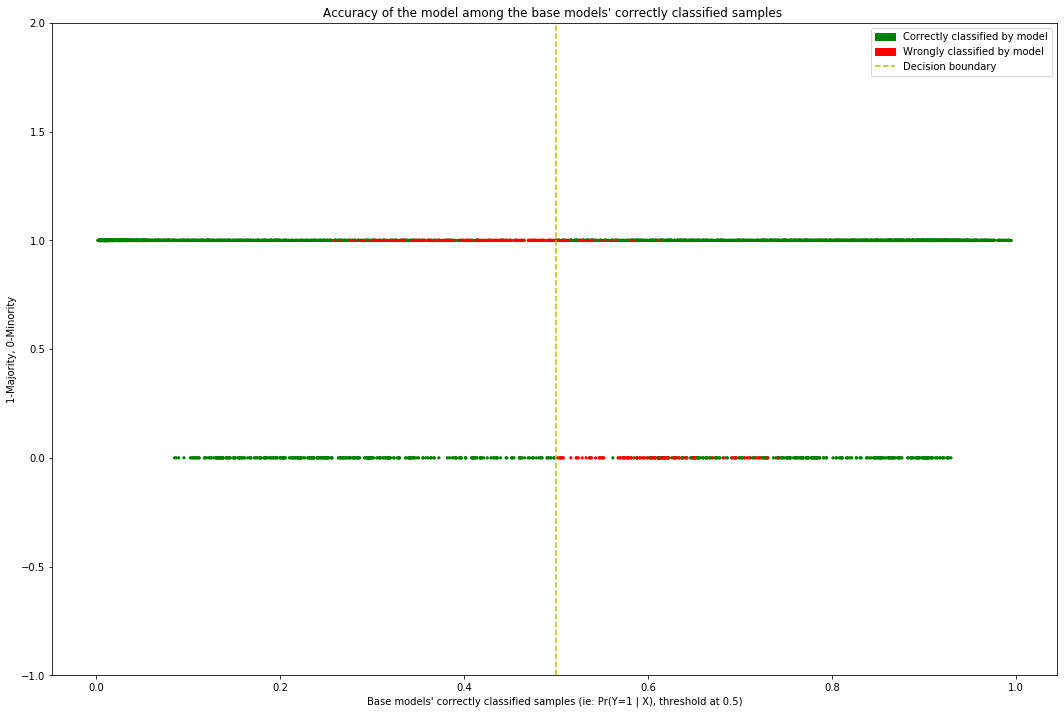

In [169]:
scatter_plots(device, maj_model, min_model, model1, test_maj_loader, test_min_loader, test_loader)

## Model 2

In [170]:
test_pred_labels, test_loss, test_accuracy, _ = test(model2_pred, device, test_loader)
accs = equalizing_odds(test_pred_labels, test_loader.dataset.label, test_loader.dataset.protect)
accs

[[0.752, 0.857], [0.79, 0.846]]

In [171]:
np.average([np.max(acc) - np.min(acc) for acc in accs])

0.08049999999999996

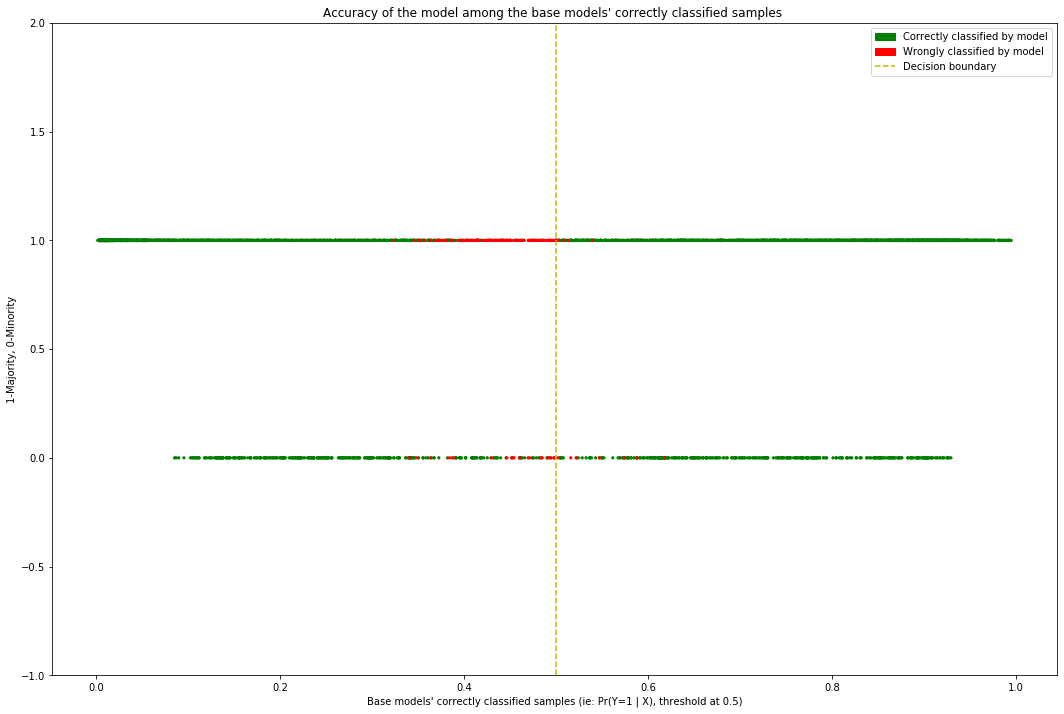

In [172]:
scatter_plots(device, maj_model, min_model, model2, test_maj_loader, test_min_loader, test_loader)

## Case 3e

In [173]:
test_pred_labels, test_loss, test_accuracy, _ = test(comb_model, device, test_loader)
accs = equalizing_odds(test_pred_labels, test_loader.dataset.label, test_loader.dataset.protect)
accs

[[0.755, 0.743], [0.817, 0.924]]

In [174]:
np.average([np.max(acc) - np.min(acc) for acc in accs])

0.05950000000000005

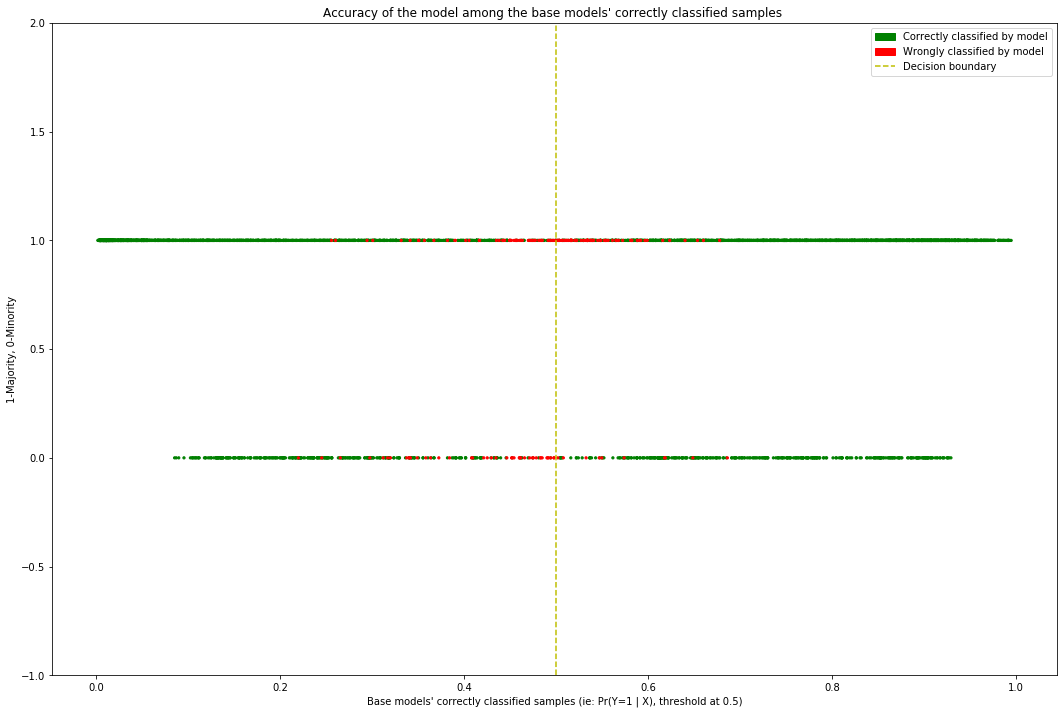

In [175]:
scatter_plots(device, maj_model, min_model, comb_model, test_maj_loader, test_min_loader, test_loader)